<a href="https://colab.research.google.com/github/TDMDegree/Level-4-Introduction-to-AI-and-ML/blob/main/workshop%201%20%20Tutorial%20Answers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Introduction

The adult dataset is from the 1994 Census database. Details of this dataset can be found at the UCI Machine Learning Repository. My main aim is to create a simple GUI so that users can input their own data and get a prediction of whether their income will exceed $50,000. The objectives that I will follow to complete my main aim are set out below:

Clean the data: Replace or delete missing data.
Explore the data: Delete any unnecessary fields and reduce the variance of individual features.
Normalise the data: Convert the needed data for modelling.
Explore the machine learning algorithms.
Optimise the selected machine learning algorithm.
Create the GUI.





Stage 1: Exploratory Data Analysis (EDA)

Task 1 - Present the code that tells me all of the columns, data types, and records

Importantly, you should begin considering whether the dimensionality of the dataset is high or low. Additionally, you should strive to understand the information described by all the columns.


In [1]:
#Task 1
import pandas as pd

df = pd.read_csv("Salary.txt",index_col=False, names = [ "age" ,"workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","label"])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


From the information collected on the dataframe, we know that there are 14 features that could be used for predicting the label column. However, from the original 15 columns, 2 columns are not self-explanatory. Both fnlwgt and education-num does not have an obvious correlation to the salary. After further examining the information on the dataset, fnlwgt is a weight on the sample and education-num is a repetitive column repeating the information in the education columns. It was decided that both columns would be dropped from the dataframe.

In [2]:
# Task 2
df = df.drop(["fnlwgt", "education-num"], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  label           32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None




From the information file on the dataset, we know that all missing data was represented as "?".

All missing data was changed to the numpy form "NaN", which meant that the numpy library had to be imported.


In [3]:
#Task 3
import numpy as np
df = df.replace(" ?", np.NaN)

A report on the missing data was then produced

In [4]:
#Task 4
print(df.isnull().sum())

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64


More information was gathered to find out how much data would be lost if we deleted all the missing data.

In [5]:
#Task 5
new_df = df.dropna()
print("################")
print("Total records that would be lost if deleted : ")
print(df.shape[0]- new_df.shape[0])
del new_df

################
Total records that would be lost if deleted : 
2399


Although we would lose only 2399 records out of 32561, further exploration of the data could result in a reduction in the loss of data.

Importantly, there are several strategies that could be used to address this missing data. Before making a decision, I need to understand the significance of the missing records and the feature itself.

**Exploring the data**

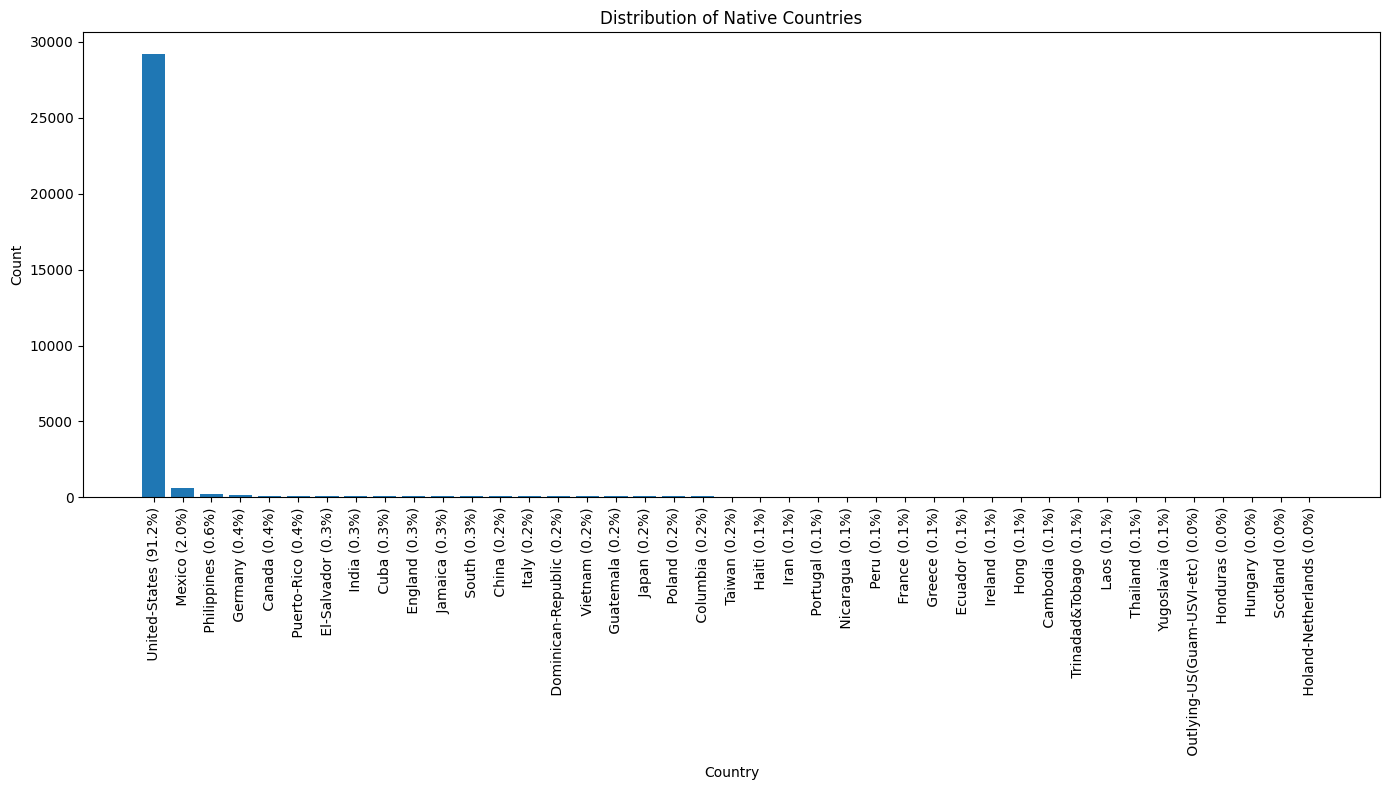

In [6]:
#Task 6
import matplotlib.pyplot as plt


native_df = df["native-country"]
native_df = native_df.value_counts().reset_index()
native_df.columns = ['country', 'count']

total_counts = native_df['count'].sum()
native_df['percentage'] = (native_df['count'] / total_counts) * 100

labels = [f"{row['country']} ({row['percentage']:.1f}%)" for _, row in native_df.iterrows()]
counts = native_df['count']

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(labels, counts)

plt.xticks(rotation=90)

ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Distribution of Native Countries')


plt.tight_layout()
plt.show()



From the information above, we can see that 1 unique value of this feature has over 91% of the data. Therefore, a decision was made to change all missing data from the Native Country column to equal "United States".

*Importantly, this was not the only handling strategy that could have been used. I could have tried to explore the correlation between country and salary to determine if I could have removed this feature completely or created a ML classification to predict the most likely country based on the other features. *

Additional, the majority of the other unique values had such a low number of records, resulting in a high cardinality for those records. The decision was made to try and combine the countries together in a way that could add to the model. The decision was to use the information from the website :

https://www.nationsonline.org/oneworld/GNI_PPP_of_countries.htm

to split the countries into high_PPP ,medium_PPP and low_PPP.

Task 7 - Replace all of np.NaN with United-States and loop round each of the arrays to replace based on high_PPP ,medium_PPP and low_PPP

low_PPP = [" Honduras", " Vietnam"," Cambodia"," Laos"," Haiti", " Yugoslavia"," India"," Guatemala", " Nicaragua"]

medium_PPP = [" Trinadad&Tobago"," Poland" ," Mexico" , " Thailand"," Iran"," Columbia", " Peru", " Philippines" ," China"," Ecuador" , " Cuba"," El-Salvador"," Jamaica"," South"]

high_PPP = [" Holand-Netherlands"," Scotland"," Ireland"," Hong"," Beligum" ," Japan"," Italy"," England"," Germany"," Canada"," France"," Taiwan"," Greece"," Portugal" , " Hungary"," Outlying-US(Guam-USVI-etc)", " Puerto-Rico", " Dominican-Republic"]

Importantly, this was not the only handling strategy that could have been used. I could have keep the data as it was and evaluated the different models to select the most suitable one.


<Axes: ylabel='count'>

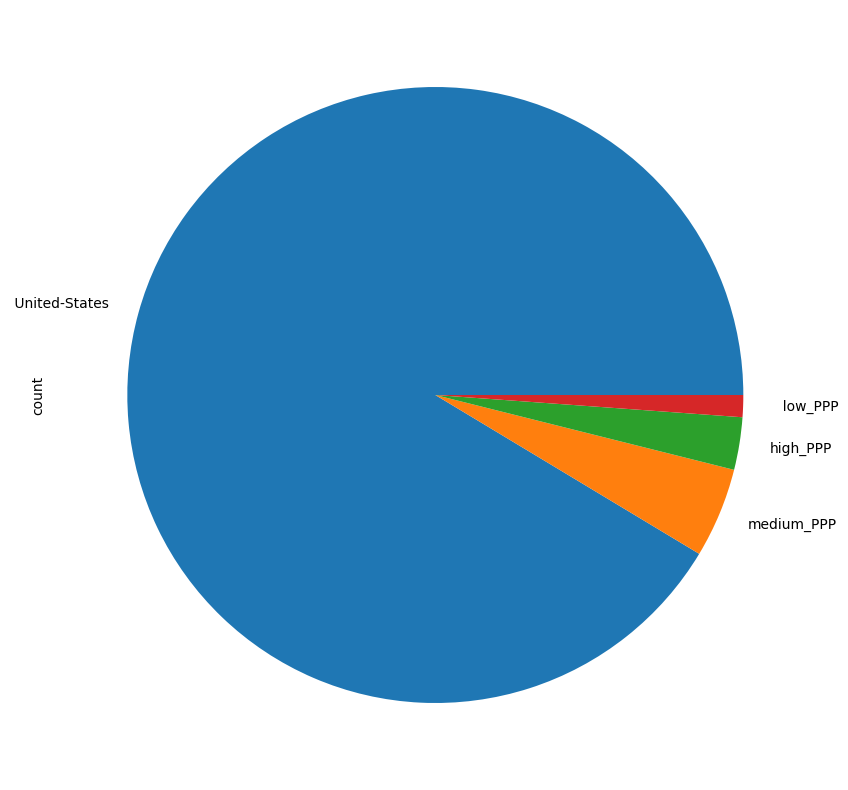

In [7]:
#Task 7
df["native-country"] = df["native-country"].replace(np.NaN , " United-States")
low_PPP = [" Honduras", " Vietnam"," Cambodia"," Laos"," Haiti",
               " Yugoslavia"," India"," Guatemala", " Nicaragua"]
medium_PPP = [" Trinadad&Tobago"," Poland" ," Mexico" , " Thailand"," Iran",
                " Columbia", " Peru", " Philippines" ," China"," Ecuador" ,
                " Cuba"," El-Salvador"," Jamaica"," South"]
high_PPP = [" Holand-Netherlands"," Scotland"," Ireland"," Hong"," Beligum" ," Japan"," Italy"," England"," Germany"," Canada"," France"," Taiwan"," Greece",
               " Portugal" , " Hungary"," Outlying-US(Guam-USVI-etc)",
               " Puerto-Rico", " Dominican-Republic"]

for i in high_PPP:
    df["native-country"] = df["native-country"].replace(i,"high_PPP")

for i in medium_PPP:
    df["native-country"] = df["native-country"].replace(i,"medium_PPP")

for i in low_PPP:
    df["native-country"] = df["native-country"].replace(i,"  low_PPP")

df["native-country"].value_counts().plot(kind="pie", figsize=(10,10))

The next step was to look at the working class data and how the data is distributed among the unique values. Does it have high cardinality ?

<Axes: ylabel='workclass'>

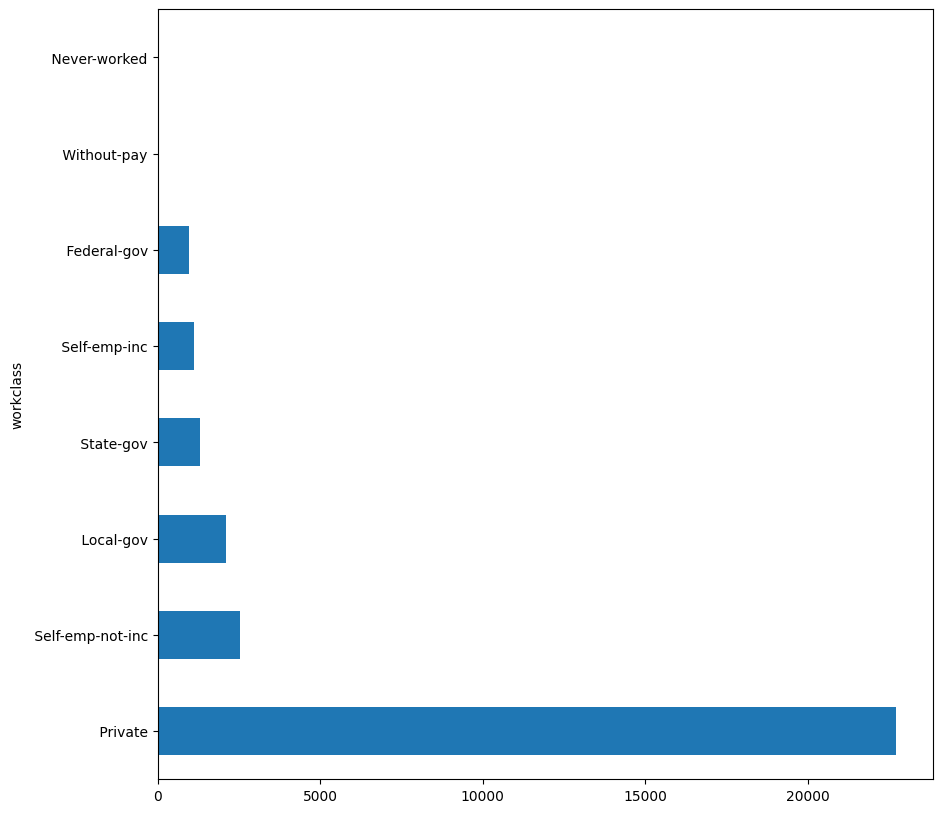

In [8]:
#task 8
df["workclass"].value_counts().plot(kind="barh",figsize=(10,10))



The majority of the data is Privately employed. With the data being skewed to the Private sector,the missing data for the working class column was placed into the Private Column.

In addition to editing the missing data, a decision was made to combine fields that had a high cardinality. The people who never work and the people who are without work were placed in the same category.

However the Government job categories remained as the mean salary for the different levels are significantly different.

-Federal government - $70,000

-State government - $53,180

-Local goverment - $47,230 (Information retrieved at https://work.chron.com/average-salary-government-employees-7863.html)

For the self employed columns, although no additional data was found showing a difference between incorporated self employers and unincorporated self-employees. It was thought that a person would incorporate their company when it grows to a significant size and so there could be a significant difference between the 2 categories. This resulted in the 2 categories being left as they were.

Task 8 - Replace the NaN to private within the workclass column and combine the never-worked and without-pay to "Umemployed"

Display the new data in the same graph as task 7


<Axes: ylabel='workclass'>

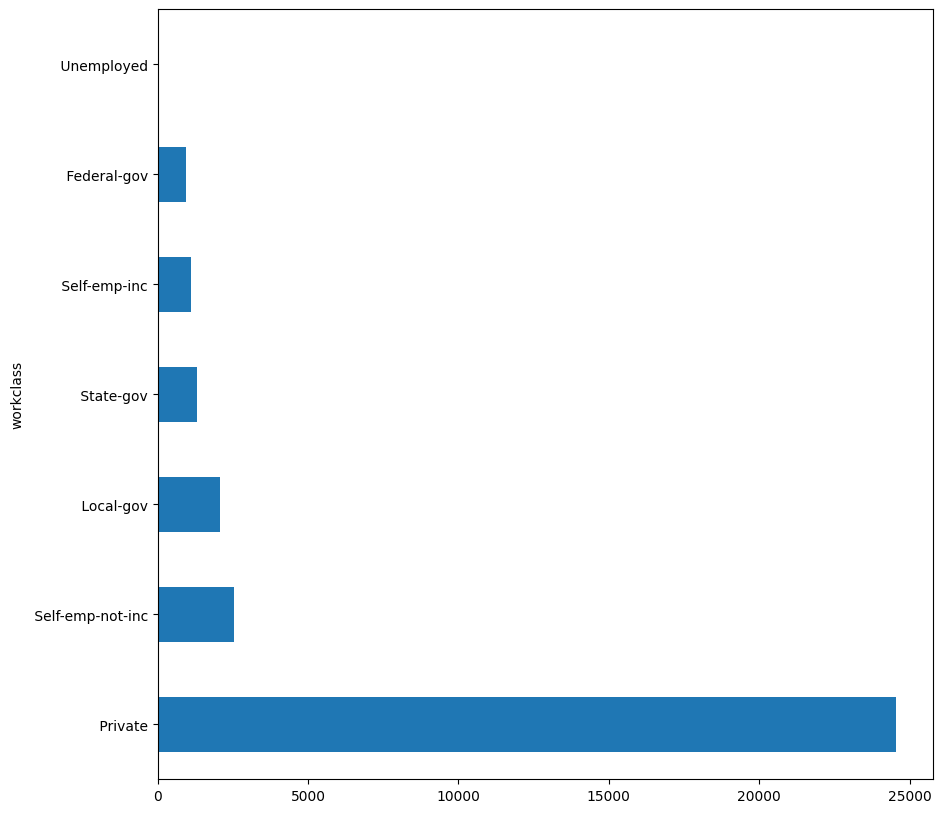

In [9]:
#Task 9
df["workclass"] = df["workclass"].replace(np.NaN," Private")
replacing = [" Never-worked"," Without-pay"]
for i in replacing :
    df["workclass"] = df["workclass"].replace(i," Unemployed")
del replacing
df["workclass"].value_counts().plot(kind="barh",figsize=(10,10))

An examination of the last column, Occupation, occurred.

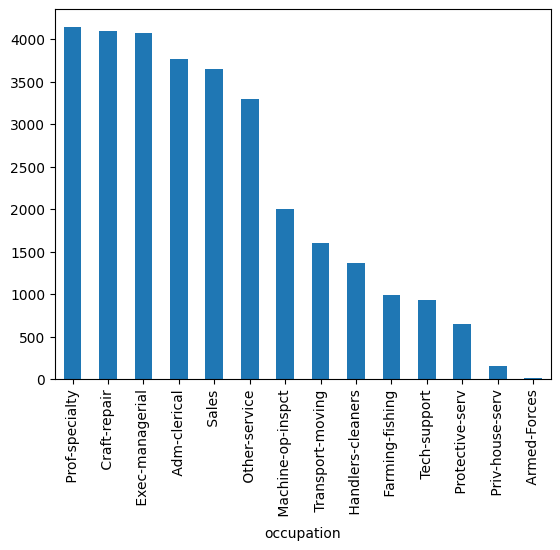

In [10]:
#Task 10
occ_df = df["occupation"].value_counts()
occ_df.plot(kind="bar")
del occ_df



The spread of the data was much more even. 3 options were considered for the missing data. The first option was to create a model that used the other features to predict which occupation the record belonged to. The second option was to delete the data. The last option was to convert the missing data to an intentional out-of-range value. This would allow some of the prediction models to ignore that piece of data.

A examination on how many records would be lost occurred.


In [11]:
print(df["occupation"].unique())
df.isnull().sum()

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


age                  0
workclass            0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
label                0
dtype: int64

The spread of the data was much more even. 3 options were considered for the missing data. The first option was to create a model that used the other features to predict which occupation the record belonged to. The second option was to delete the data. The last option was to convert the missing data to an intentional out-of-range value. This would allow some of the prediction models to ignore that piece of data(You would need to make sure you select the right model for this).

The results of that examination showed that 1843 would still be lost. After creating a model using KNNclasifer, the model came to only a 33% chance of guessing the correct label. Additionally, due to the size of the remaining sample,it was deemed acceptable to lose this number of records.

*Here I tried to created a ML classification to predict the most likely country based on the other features. I could have continue with this but 33% acc is very *

In [12]:
#task 11
df = df.dropna()



Once all the missing data was either replaced or deleted. The other columns were examined to see if the varience in each columns could be reduced.

To get a better idea if certain data categories could be combined an examine on the bias of dataframe was conducted.


In [13]:
#Task 12
education_df = df[["label","education"]]
ed_below_50 = education_df[education_df["label"] == " <=50K" ]
ed_above_50 = education_df[education_df["label"] == " >50K" ]
print("Number of records above 50000 :")
print(ed_above_50.shape[0])
print("################################")
print("Number of records below 50000 :")
print(ed_below_50.shape[0])
print("################################")

Number of records above 50000 :
7650
################################
Number of records below 50000 :
23068
################################


Using this information, a graph was created from the education column that showed the distribution of the data in each of the eductional categories.

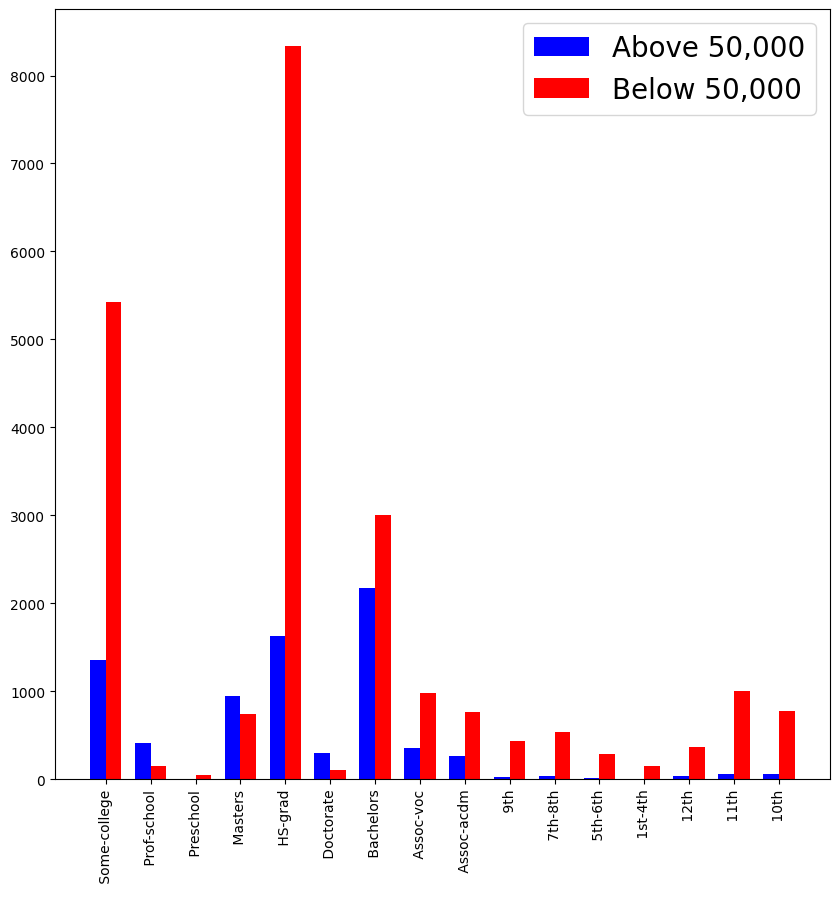

In [14]:
#Task 13
ed_above_50 = ed_above_50.groupby("education").agg(["count"])
ed_below_50 = ed_below_50.groupby("education").agg(["count"])
ed_above_50.loc[" Preschool"] = 0
ed_above_50 = ed_above_50.sort_index(ascending = False)
ed_below_50 = ed_below_50.sort_index(ascending = False)
labels = list(ed_above_50.index)
index = np.arange(1,ed_above_50.shape[0]+1)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
rect1 = ax.bar(index - bar_width / 2 ,ed_above_50[("label","count")],bar_width,color="b", label="Above 50,000")
rect2 = ax.bar(index + bar_width /2 , ed_below_50[("label","count")], bar_width,color="r", label="Below 50,000")
ax.legend(fontsize = "20")
ax.set_xticks(index)
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [15]:
#Task 14
replacing = [" 11th"," 10th"," 7th-8th"," 9th"," 12th"," 5th-6th"," 1st-4th"," Preschool"]
for i in replacing:
    df["education"] = df["education"].replace(i," Dropout")
print(df["education"].unique())

[' Bachelors' ' HS-grad' ' Dropout' ' Masters' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' Doctorate' ' Prof-school']


This step was then repeated for both the "Martial Status" and "Relationship" columns.An examination of these columns took place to see if there was any redundancy between the two columns.

In [16]:
print(df["marital-status"].value_counts())
print(df["relationship"].value_counts())

marital-status
 Married-civ-spouse       14339
 Never-married             9912
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: count, dtype: int64
relationship
 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: count, dtype: int64


Even though there is some cross over between the two columns, it was decided to keep both. However, for the relationship column, the "Husband" and "Wife" categories were combined into 1 named married, and the "Not - in - Family" was added to the unmarried categry.

In [17]:
married_replacing = [" Husband", " Wife"]
for i in married_replacing:
    df["relationship"]= df["relationship"].replace(i," Married")

df["relationship"]= df["relationship"].replace(" Not-in-family"," Unmarried")
print(df["relationship"].value_counts())

relationship
 Married           14139
 Unmarried         11136
 Own-child          4525
 Other-relative      918
Name: count, dtype: int64


This process was repeated for the "Martial Status" column as the separated records were combines with the divorced data and the "Married Civ Spouse" and "Married AF Spouse" were combined into the Married data.

In [18]:
df["marital-status"]= df["marital-status"].replace(" Separated"," Divorced")
df["marital-status"]= df["marital-status"].replace(" Married-civ-spouse"," Married")
df["marital-status"]= df["marital-status"].replace(" Married-AF-spouse"," Married")
print(df["marital-status"].value_counts())

marital-status
 Married                  14360
 Never-married             9912
 Divorced                  5217
 Widowed                    840
 Married-spouse-absent      389
Name: count, dtype: int64


The next stage I want to explore involves identifying outliers in the continuous data (not the categorical data) within the dataset.

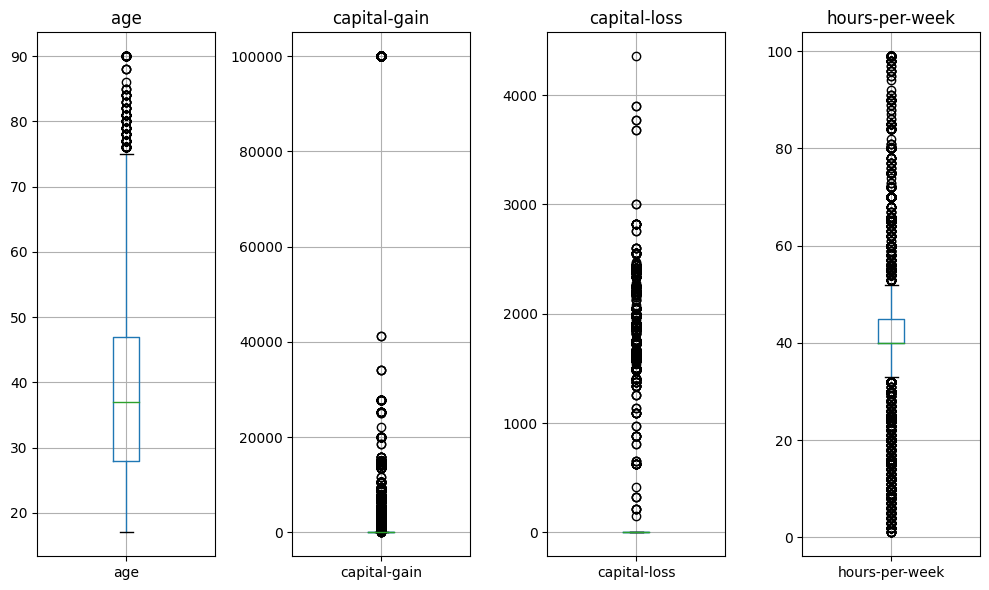

In [19]:
continuous_int_cols = df.select_dtypes(include=['int64']).columns

# Create box plots for each continuous integer column
plt.figure(figsize=(10, 6))
for col in continuous_int_cols:
    plt.subplot(1, len(continuous_int_cols), list(continuous_int_cols).index(col) + 1)
    df.boxplot(column=col)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

You should be considering whether you should keep the outliers or not. Remember that your main aim is to make sure that you ML model has the best data possible. Here’s an explanation of why outliers might be considered for either retention or removal based on these variables:

    Age:
        Reasons to Keep Outliers: Age outliers might represent unique cases such as individuals with advanced careers or early retirees who might have higher income levels, thus impacting the likelihood of earning over $50,000.
        Reasons to Remove Outliers: Extremely high or low ages might skew the analysis if the salary expectation varies significantly with age. For instance, younger individuals might have lower salaries due to less experience.

    Capital-Gain and Capital-Loss:
        Reasons to Keep Outliers: Large capital gains or losses could indicate significant financial transactions or investments, which may influence income levels significantly.
        Reasons to Remove Outliers: Extremely large gains or losses could be outliers due to data entry errors or rare events that don’t represent typical income situations.

    Hours-per-Week:
        Reasons to Keep Outliers: Some individuals may work exceptionally long hours with overtime or multiple jobs, which could lead to higher earnings.
        Reasons to Remove Outliers: Outliers in hours worked per week might include errors or atypical situations that do not reflect regular income patterns.

In our analysis, I have decided to keep all outliers apart from age. I really should provide more reason here why I have done this. However, I have randomly picked age to demonstrate how to do it.



<Axes: >

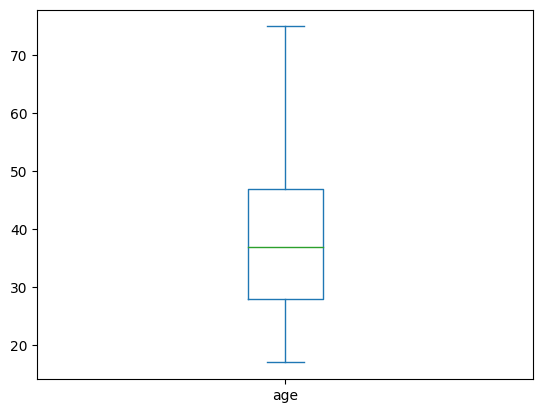

In [20]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
df['age'].plot(kind='box')



Encoding the data

The data has been cleaned and combined to make it more effective in the modeling process.However, currently there are still a number of columns that have an unsuitable datatype for some of the machine learning algorithms that I will be using.

I will be converting all the object datatypes to a numerical type. The options that I have for this are using the Labelencoder and OneHotEncoder.

Due to the non-ordinal relations between the data categories in each column. I have chosen to use pandas.get_dummies on the object datatypes -

["workclass","education","marital-status","occupation","relationship","race","sex","native-country" were converted to a numeric value.]


In [21]:
df.info()
features = df[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]]
new_features = pd.get_dummies(features)

<class 'pandas.core.frame.DataFrame'>
Index: 30546 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30546 non-null  int64 
 1   workclass       30546 non-null  object
 2   education       30546 non-null  object
 3   marital-status  30546 non-null  object
 4   occupation      30546 non-null  object
 5   relationship    30546 non-null  object
 6   race            30546 non-null  object
 7   sex             30546 non-null  object
 8   capital-gain    30546 non-null  int64 
 9   capital-loss    30546 non-null  int64 
 10  hours-per-week  30546 non-null  int64 
 11  native-country  30546 non-null  object
 12  label           30546 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


These features are then added to the original dataframe, and the original columns deleted.

In [22]:
df.reset_index(inplace= True)
new_features.reset_index(inplace= True)
df = pd.merge(df,new_features,on="index",how="inner")
df = df.drop(["index","workclass","education","marital-status","relationship","race","sex","native-country","occupation"],axis=1)
df.head(2)

,age,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ low_PPP,native-country_ United-States,native-country_high_PPP,native-country_medium_PPP
0,39,2174,0,40,<=50K,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1,50,0,0,13,<=50K,False,False,False,False,True,...,False,False,False,True,False,True,False,True,False,False




Continuing with the necessary conversion of the data, the label column was updated so that:

0 = Below $50,000

1 = Above $50,000


In [23]:

df['label'] = df['label'].apply(lambda x : 0 if '<=50K' in x else 1)
df.head(2)

,age,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ low_PPP,native-country_ United-States,native-country_high_PPP,native-country_medium_PPP
0,39,2174,0,40,0,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1,50,0,0,13,0,False,False,False,False,True,...,False,False,False,True,False,True,False,True,False,False


Feature Selection

Feature selection was then conducted to identify any highly or lowly correlated relationships between the label and the different variables. This process aims to reduce the dimensions of the dataset.

No features were removed; however, justification should be provided regarding why this ML model was selected based on these findings.

Importantly, this was just start and should have continued further for a more detailed correlation investigation

In [24]:
print (df[['label','capital-gain','age']].corr())


                 label  capital-gain       age
label         1.000000      0.221142  0.254107
capital-gain  0.221142      1.000000  0.081490
age           0.254107      0.081490  1.000000


Lastly, I droped the label so I can start scaling and normalising the features.

In [25]:
label_df = df['label']
features = df.drop("label",axis = 1)
print(features.columns)


Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Unemployed',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ Dropout', 'education_ HS-grad',
       'education_ Masters', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married', 'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Widowed',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Pr

Scaling the Data



The features were then scaled due to the differences between distributions of the features.

Importantly, I should really prove this by showing the distributions of the different features and discussing how it would impact the different ML models

The MinMaxScaler was used to transforms the data.


In [26]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(features)
scaled_df = scaler.transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=features.columns)
scaled_df.head(5)

,age,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ low_PPP,native-country_ United-States,native-country_high_PPP,native-country_medium_PPP
0,0.379310,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.568966,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.362069,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.620690,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.189655,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0




Exploring the machine learning algorithms

With the transformation of the data complete, a selection of algorithms were chosen to explore the best method to predict the salary classification. Below are the selected algorithms :

1)Logestic Regression

2)Random Forest Tree

3)Extra Trees

4)Support Vector Machine

5)Neural Network


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


The data was then divided into test and train datasets. We have 2 ways to divide our data, with the train_test_split option and cross_val_score. We will initially see the results from the test_train_split.

In [28]:
#task 15
X_train, X_test,y_train,y_test = train_test_split(scaled_df,label_df)

The classifiers are then set to their default settings and each classifier is trained and tested with the data.

In [29]:
classifiers = [
    ExtraTreesClassifier(n_estimators=100),
    svm.SVC(gamma='scale'),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(max_iter=1000),
    LogisticRegression(max_iter=1000)
]

alo = []
min_max = []
standard_list = []
confusion_matrix_list = []
for clf in classifiers:
    clf.fit(X_train,y_train)
    name = clf.__class__.__name__
    alo.append(name)
    prediction = clf.predict(X_test)
    acc = accuracy_score(y_test, prediction)
    min_max.append(acc)
    matrix = confusion_matrix(y_test, prediction)
    confusion_matrix_list.append(matrix)

This information is placed in a chart so we can compare the accuracy of each classifier.

[0.8267644362969753, 0.8334424512243027, 0.8419536467199162, 0.8444415346340186, 0.8431321199423858]
0.8444415346340186


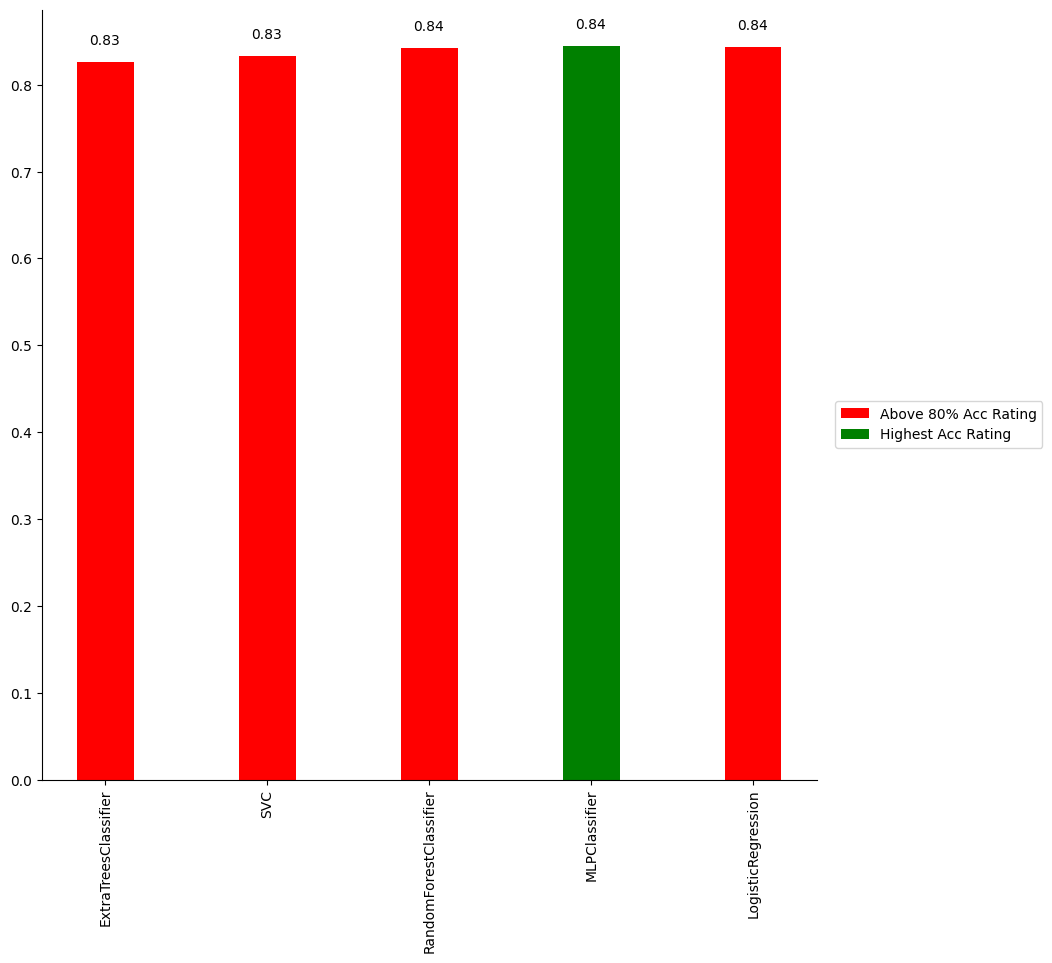

In [30]:
print(min_max)
max_val = max(min_max)
print(max_val)
labels = list(alo)
index = np.arange(1,len(alo)+1)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
red_counter = False
blue_counter = False
for i in range(0,len(index)):
    if max_val == min_max[i]:
        colour = "Green"
        label = "Highest Acc Rating"
        ax.bar(index[i] ,min_max[i],bar_width,color=colour , label = label)
    elif  min_max[i] > 0.8:
        colour = "r"
        label = "Above 80% Acc Rating"
        if red_counter == False:
            ax.bar(index[i] ,min_max[i],bar_width,color=colour , label = label)
            red_counter = True
        else:
            ax.bar(index[i] ,min_max[i],bar_width,color=colour)

    else:
        label ="Below 80% Acc Rating"
        colour = "b"
        if blue_counter == False:
            ax.bar(index[i] ,min_max[i],bar_width,color=colour , label = label)
            blue_counter =True
        else:
            ax.bar(index[i] ,min_max[i],bar_width,color=colour)


ax.legend(bbox_to_anchor=(1.3, 0.5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(range(1,len(labels)+1), labels)
for index,info in enumerate(ax.get_xticklabels()):
    info.set_rotation(90)
    ax.text(index+0.90,min_max[index]+0.02,"{:.2f}".format(min_max[index]))



As we can see,  all machine learning algorithms are above 80% with the NN slightly edging it at >85 % accuracy. With so many algorithms having a similar accuracy rating, further investigation will be undertaken by looking at the confusion matrix.





<ipython-input-31-65931b0b35af>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels)
<ipython-input-31-65931b0b35af>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels)


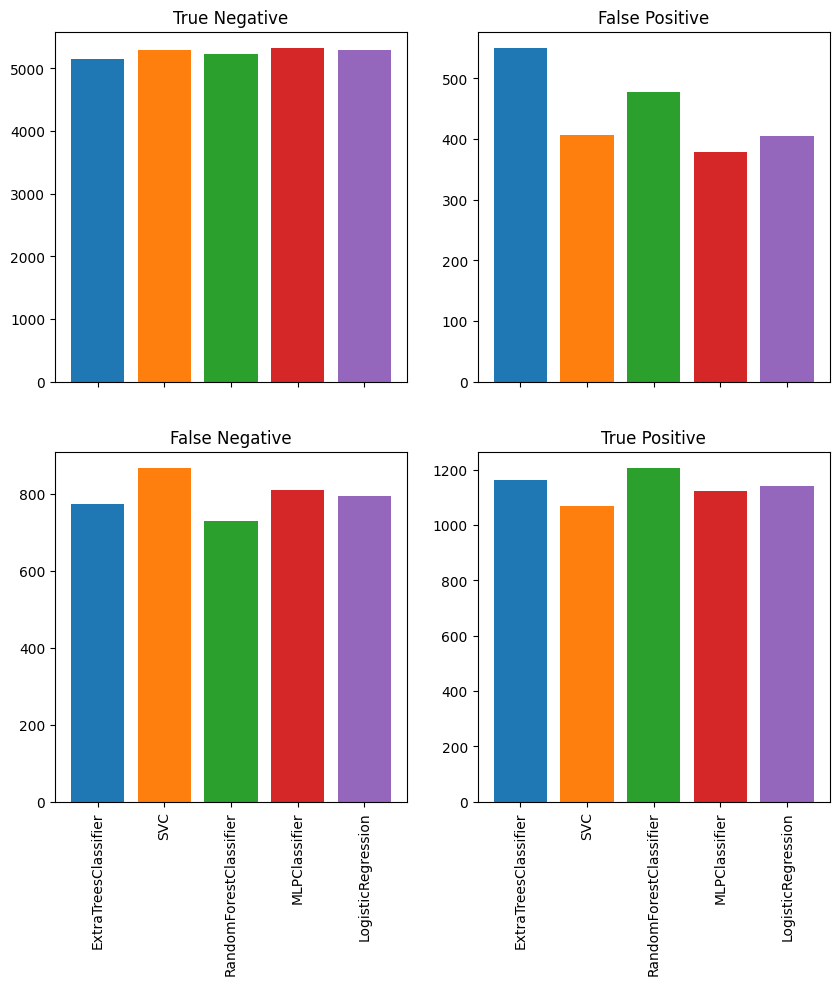

In [31]:
from matplotlib.gridspec import GridSpec
confusion_matrix_list
fig = plt.figure(figsize=(10,10))
gs = GridSpec(2,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

ax1_info =[]
ax2_info =[]
ax3_info =[]
ax4_info =[]

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

for index,clf in enumerate(confusion_matrix_list):
    for index1,info_list in enumerate(clf):
        counter = 1
        for index2,info in enumerate(info_list):
            if index1 == 0:
                if index2 == 0 :
                    ax1_info.append(info)
                elif index2 == 1 :
                    ax2_info.append(info)
            elif index1 == 1:
                if index2 == 0 :
                    ax3_info.append(info)
                elif index2 == 1 :
                    ax4_info.append(info)

for index in range(1,len(ax1_info)+1):
    ax1.bar(index , ax1_info[index-1])
    ax2.bar(index , ax2_info[index-1])
    ax3.bar(index , ax3_info[index-1])
    ax4.bar(index , ax4_info[index-1])

ax1.set_title("True Negative")
ax2.set_title("False Positive")
ax3.set_title("False Negative")
ax4.set_title("True Positive")

labels.insert(0,"None")
ax3.set_xticklabels(labels)
ax4.set_xticklabels(labels)

for labelax3,labelax4 in zip(ax3.get_xticklabels(),ax4.get_xticklabels()):
    labelax3.set_rotation(90)
    labelax4.set_rotation(90)

When evaluating a classification machine learning model, it's essential to use appropriate metrics that reflect its performance accurately. Metrics such as accuracy, precision, recall (sensitivity), and F1-score are suitable for assessing classification models. Accuracy measures the proportion of correctly classified instances out of the total instances, providing an overall view of the model's correctness. Precision quantifies the accuracy of positive predictions, while recall (sensitivity) measures the proportion of actual positives that are correctly identified by the model. The F1-score, which is the harmonic mean of precision and recall, balances these two metrics and is particularly useful in scenarios where there is an uneven class distribution.
